# (a) 
Value for u(mu) for 3 coins is 0.5 since all are fair coins and P[heads]=P[tails]=0.5 for fair coins

# (b) Histograms for 100,000 samples of 1st coin, random coin and coin with minimum heads

In [213]:
"""Let 1--> Heads and 0--> Tails"""
import random
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#from numba import jit,cuda

In [153]:
number_of_coins = 1000
toss_count = 10
no_of_experiments = 100000
experiment_dict = dict()

In [15]:
def Get_Min_Coin(coins_dict):
    neu_min = math.inf
    Coin = None
    for coin,tosses in coins_dict.items():
        heads = sum(tosses)/len(tosses)
        if heads < neu_min:
            neu_min = heads
            Coin = coin
    return (Coin,neu_min)

In [16]:
def Get_Random_Coin(coins_dict):
    ind = random.randint(0,len(coins_dict)-1)
    neu_random = sum(coins_dict[ind])/len(coins_dict[ind])
    return (coins_dict[ind],neu_random)

In [9]:
def Get_First_Coin(coins_dict):
    neu_one = sum(coins_dict[0])/len(coins_dict[0])
    return (list(coins_dict.keys())[0],neu_one)


In [17]:
def Experiment(number_of_coins,toss_count):
    coins_dict = dict([(key,[]) for key in range(number_of_coins)])
    for i in range(number_of_coins):
        for j in range(toss_count):
            rand = random.randint(0,1)
            coins_dict[i].append(rand)
    neu_one = Get_First_Coin(coins_dict)[1]
    neu_random = Get_Random_Coin(coins_dict)[1]
    neu_min = Get_Min_Coin(coins_dict)[1]
    return [neu_one,neu_random,neu_min]

In [18]:
def Repeat_Experiment(no_of_experiments,number_of_coins,toss_count):
    neu_one_list = list()
    neu_random_list = list()
    neu_min_list = list()
    experiment_dict = dict([(key,[]) for key in range(no_of_experiments)])
    for experiment in range(no_of_experiments):
        neu_list = Experiment(number_of_coins,toss_count)
        for i,value in enumerate(neu_list):
            experiment_dict[experiment].append(value)
            if i == 0:
                neu_one_list.append(value)
            elif i == 1:
                neu_random_list.append(value)
            else:
                neu_min_list.append(value)
    return experiment_dict,neu_one_list,neu_random_list,neu_min_list

experiment_dict,neu_one_list,neu_random_list,neu_min_list = Repeat_Experiment(no_of_experiments,number_of_coins,toss_count)

Text(0.5,0,'Random Coin Distribution')

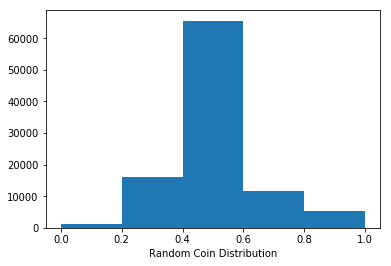

In [251]:
plt.hist(neu_random_list,bins=5)
plt.xlabel('Random Coin Distribution')

Text(0.5,0,'First Coin Distribution')

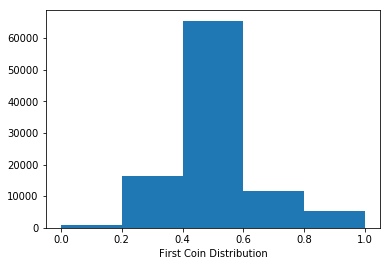

In [252]:
plt.hist(neu_one_list,bins=5)
plt.xlabel('First Coin Distribution')

Text(0.5,0,'Minimum Heads Coin Distribution')

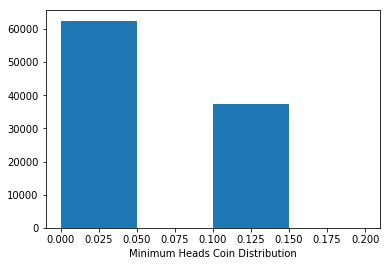

In [253]:
plt.hist(neu_min_list,bins=4)
plt.xlabel('Minimum Heads Coin Distribution')

# (c) Estimates of P[|v -u| > epsilon] <= 2*exp(-2*N*epsilon^2) (Hoeffding Bound) (All bounds on same graph)

P_hoeffding_lst_rand : [0.7555, 0.34471, 0.10907, 0.06546, 0.00178, 0.0, 0.0, 0.0]
P_hoeffding_lst_first [0.75559, 0.34558, 0.10922, 0.06428, 0.00198, 0.0, 0.0, 0.0]


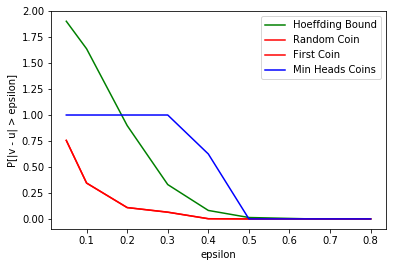

In [256]:
epsilon_lst = [0.05,0.1,0.2,0.3,0.4,0.5,0.65,0.8]
mu = 0.5             # Fair coin so P[head] = P[tail] = 0.5
hflst = []
N = 10
Hoeffding_bound = 2*math.exp(-2*N*epsilon**2)
P_hoeffding_lst_rand = list()
P_hoeffding_lst_first = list()
P_hoeffding_lst_min = list()
for epsilon in epsilon_lst:
    outside_epsilon_rand = 0
    outside_epsilon_first = 0
    outside_epsilon_min = 0
    for neu_rand in neu_random_list:
        diff = np.absolute(neu_rand - mu)
        if diff > epsilon:
            outside_epsilon_rand += 1
    P_hoeffding_bound_rand = outside_epsilon_rand/len(neu_random_list)
    P_hoeffding_lst_rand.append(P_hoeffding_bound_rand)
    for neu_first in neu_one_list:
        diff = np.absolute(neu_first - mu)
        if diff > epsilon:
            outside_epsilon_first += 1
    P_hoeffding_bound_first = outside_epsilon_first/len(neu_one_list)
    P_hoeffding_lst_first.append(P_hoeffding_bound_first)
    for neu_first in neu_min_list:
        diff = np.absolute(neu_first - mu)
        if diff > epsilon:
            outside_epsilon_min += 1
    P_hoeffding_bound_min = outside_epsilon_min/len(neu_one_list)
    P_hoeffding_lst_min.append(P_hoeffding_bound_min)
    hflst.append(2*math.exp(-2*10*epsilon**2))
print('P_hoeffding_lst_rand :',P_hoeffding_lst_rand)
print('P_hoeffding_lst_first',P_hoeffding_lst_first)    
#plt.plot(epsilon_lst,Hoeffding_bound)
plt.plot(epsilon_lst,hflst,c='g')
plt.plot(epsilon_lst,P_hoeffding_lst_rand,c='r')
plt.plot(epsilon_lst,P_hoeffding_lst_first,c='r')
plt.plot(epsilon_lst,P_hoeffding_lst_min,c='b')
plt.xlabel('epsilon')
plt.ylabel('P[|v - u| > epsilon]')
plt.legend(['Hoeffding Bound','Random Coin','First Coin','Min Heads Coins'])

# Bounds on different graphs

[0.7555, 0.34471, 0.10907, 0.06546, 0.00178, 0.0, 0.0, 0.0]


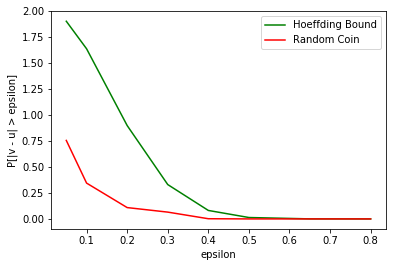

In [246]:
P_hoeffding_lst_rand = list()
for epsilon in epsilon_lst:
    outside_epsilon_rand = 0
    for neu_rand in neu_random_list:
        diff = np.absolute(neu_rand - mu)
        if diff > epsilon:
            outside_epsilon_rand += 1
    P_hoeffding_bound = outside_epsilon_rand/len(neu_random_list)
    P_hoeffding_lst_rand.append(P_hoeffding_bound)
print(P_hoeffding_lst_rand)
hflst_first = []
for epsilon in epsilon_lst:
    hflst_first.append(2*math.exp(-2*N*epsilon**2))
#plt.plot(epsilon_lst,Hoeffding_bound)
plt.plot(epsilon_lst,hflst_first,c='g')
plt.plot(epsilon_lst,P_hoeffding_lst_rand,c='r')
plt.xlabel('epsilon')
plt.ylabel('P[|v - u| > epsilon]')
plt.legend(['Hoeffding Bound','Random Coin'])

[0.75559, 0.34558, 0.10922, 0.06428, 0.00198, 0.0, 0.0, 0.0]


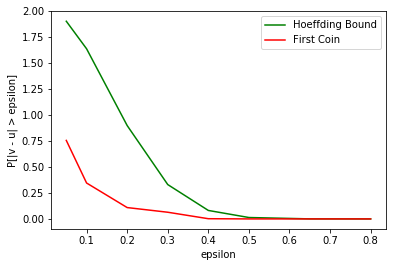

In [247]:
P_hoeffding_lst_first = list()
for epsilon in epsilon_lst:
    outside_epsilon_first = 0
    for neu_first in neu_one_list:
        diff = np.absolute(neu_first - mu)
        if diff > epsilon:
            outside_epsilon_first += 1
    P_hoeffding_bound = outside_epsilon_first/len(neu_one_list)
    P_hoeffding_lst_first.append(P_hoeffding_bound)
print(P_hoeffding_lst_first)
hflst_first = []
for epsilon in epsilon_lst:
    hflst_first.append(2*math.exp(-2*N*epsilon**2))
#plt.plot(epsilon_lst,Hoeffding_bound)
plt.plot(epsilon_lst,hflst_first,c='g')
plt.plot(epsilon_lst,P_hoeffding_lst_first,c='r')
plt.xlabel('epsilon')
plt.ylabel('P[|v - u| > epsilon]')
plt.legend(['Hoeffding Bound','First Coin'])

[1.0, 1.0, 1.0, 0.99998, 0.62492, 0.0, 0.0, 0.0]


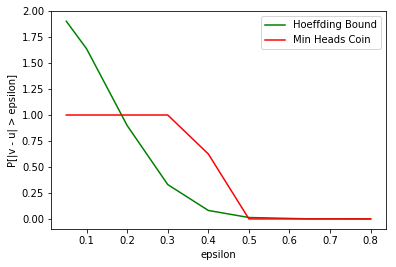

In [248]:
P_hoeffding_lst_min = list()
for epsilon in epsilon_lst:
    outside_epsilon_min = 0
    for neu_first in neu_min_list:
        diff = np.absolute(neu_first - mu)
        if diff > epsilon:
            outside_epsilon_min += 1
    P_hoeffding_bound = outside_epsilon_min/len(neu_one_list)
    P_hoeffding_lst_min.append(P_hoeffding_bound)
print(P_hoeffding_lst_min)
hflst_min = []
for epsilon in epsilon_lst:
    hflst_min.append(2*math.exp(-2*N*epsilon**2))
#plt.plot(epsilon_lst,Hoeffding_bound)
plt.plot(epsilon_lst,hflst_min,c='g')
plt.plot(epsilon_lst,P_hoeffding_lst_min,c='r')
plt.xlabel('epsilon')
plt.ylabel('P[|v - u| > epsilon]')
plt.legend(['Hoeffding Bound','Min Heads Coin'])

# (d)

Coins with min heads i.e v_min does not follow Hoeffding bound as shown in figure above. Coins c_1 and c_rand obey the Hoeffding bound

Why ? --> Because to invoke Hoeffding Inequality the the data needs to be sampled randomly from an underlying probability distribution. In c_1 and c_rand there is randomness, But in c_min we are always choosing minimum heads coin which is a deterministic sampling. Hence Hoeffding cannot be invoked.

# (e)
It is possible that when we choose our sample, it might be all green marbles, but its not probable(slide 58).
Part (d) shows that if we just choose the bin which classifies all points as green, then its not a true representation of our target function. i.e In sample probability does not approximate real probability.

Therefore, if we choose the bin with all green marbles we cannot guarentee by Hoeffding that it will generalise for out of sample as well.

Here to bound the P[|v - u| > epsilon] we will have to apply Union Bound as on slide 76 and M here will be 1000.